In [31]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import sys
sys.path.append('../')

In [33]:
from src.environments import centipede_v0
import supersuit as ss
from pettingzoo.utils.conversions import to_parallel

In [55]:
from stable_baselines3.common.monitor import Monitor


In [58]:
env = centipede_v0.env(prob=True)
#env = rpsls_v1.env()


#env = ss.agent_indicator_v0(env)


Centipede!
{'player_0': Discrete(3), 'player_1': Discrete(3)}


In [59]:
from pettingzoo.utils import random_demo
random_demo(env)


Current moves of: player_0 , NONE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

flipped
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

flipped
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

flipped
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

flipped
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

flipped
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current

flipped
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

flipped
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

flipped
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

flipped
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

flipped
Current moves of: player_0 , COOPERA

0

In [309]:
%debug

> <ipython-input-306-b8d5894edafb>(1)<module>()
----> 1 env = centipede_v0.env(prob=True)
      2 #env = rpsls_v1.env()
      3 
      4 
      5 #env = ss.agent_indicator_v0(env)

ipdb> q


In [16]:
env = centipede_v0.env()

env = to_parallel(env)

env = ss.pettingzoo_env_to_vec_env_v0(env)
env = ss.concat_vec_envs_v0(env, 1, base_class='stable_baselines3')



Centipede!
{'player_0': Discrete(3), 'player_1': Discrete(3)}


In [17]:
from stable_baselines3.common.monitor import Monitor


In [18]:
from stable_baselines3 import PPO, A2C, DQN

model = PPO('MlpPolicy', 
            env, 
            verbose=3,
            tensorboard_log='tmp/',
            )
model.learn(total_timesteps=2000000)
model.save("policy")

Using cpu device
Logging to tmp/PPO_15
-----------------------------
| time/              |      |
|    fps             | 3568 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 4096 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 2190        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | -0.05612098 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.676      |
|    explained_variance   | 0.0967      |
|    learning_rate        | 0.0003      |
|    loss                 | 1.16        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0161     |
|    value_loss           | 4.25        |
-------------------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 1579         |
|    iterations           | 13           |
|    time_elapsed         | 33           |
|    total_timesteps      | 53248        |
| train/                  |              |
|    approx_kl            | 0.0057872673 |
|    clip_fraction        | 0.0293       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.277       |
|    explained_variance   | 0.0604       |
|    learning_rate        | 0.0003       |
|    loss                 | 42.3         |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00281     |
|    value_loss           | 73.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1437         |
|    iterations           | 14           |
|    time_elapsed         | 39           |
|    total_

--------------------------------------------
| time/                   |                |
|    fps                  | 1487           |
|    iterations           | 24             |
|    time_elapsed         | 66             |
|    total_timesteps      | 98304          |
| train/                  |                |
|    approx_kl            | -0.00041827577 |
|    clip_fraction        | 0.00696        |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.0981        |
|    explained_variance   | 0.00295        |
|    learning_rate        | 0.0003         |
|    loss                 | 38.3           |
|    n_updates            | 230            |
|    policy_gradient_loss | -0.000779      |
|    value_loss           | 109            |
--------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1490         |
|    iterations           | 25           |
|    time_elapsed 

-------------------------------------------
| time/                   |               |
|    fps                  | 1513          |
|    iterations           | 35            |
|    time_elapsed         | 94            |
|    total_timesteps      | 143360        |
| train/                  |               |
|    approx_kl            | -0.0013559157 |
|    clip_fraction        | 0.0043        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0546       |
|    explained_variance   | -0.000106     |
|    learning_rate        | 0.0003        |
|    loss                 | 60.5          |
|    n_updates            | 340           |
|    policy_gradient_loss | -0.00183      |
|    value_loss           | 126           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1514          |
|    iterations           | 36            |
|    time_elapsed         | 97  

-------------------------------------------
| time/                   |               |
|    fps                  | 1398          |
|    iterations           | 46            |
|    time_elapsed         | 134           |
|    total_timesteps      | 188416        |
| train/                  |               |
|    approx_kl            | 0.00038543108 |
|    clip_fraction        | 0.00891       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.08         |
|    explained_variance   | -0.0122       |
|    learning_rate        | 0.0003        |
|    loss                 | 76.9          |
|    n_updates            | 450           |
|    policy_gradient_loss | -0.00143      |
|    value_loss           | 149           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1402          |
|    iterations           | 47            |
|    time_elapsed         | 137 

KeyboardInterrupt: 

In [19]:
r = []

for i in range(100):

    env = centipede_v0.env()

    #env = ss.agent_indicator_v0(env)
    rewards = []
    env.reset()
    for agent in env.agent_iter():
        obs, reward, done, info = env.last()
        rewards.append(reward)
        obs = obs
        print('obs', obs)
        act = model.predict(obs)[0] if not done else None
        print('action', act)
        env.step(act)
        env.render()
    
    r.append(len(rewards))
rewards

Centipede!
{'player_0': Discrete(3), 'player_1': Discrete(3)}
obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current move

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , N

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 0
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 0
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re


obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPE

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 0
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 0
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , DEFECT
Current moves of: player_1 , COOPERATE
rewards {'player_0': 19, 'player_1': 17}

obs 1
action None
Current moves of: player_1 , COOPERATE
rewards {'player_1': 0}

obs 0
action None
rewards {}

Centipede!
{'player_0': Discrete(3), 'player_1': Discrete(3)}
obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPER

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 0
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action None
Current moves of: player_1 , COOPERATE
rewards {'player_1': 0}

obs 1
action None
rewards {}

Centipede!
{'player_0': Discrete(3), 'player_1': Discrete(3)}
obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPE

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , N

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPER

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPE

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 1
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
re

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 52,
 50]

/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

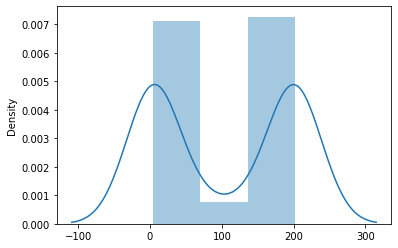

In [183]:
import seaborn as sns

sns.distplot(r)

/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

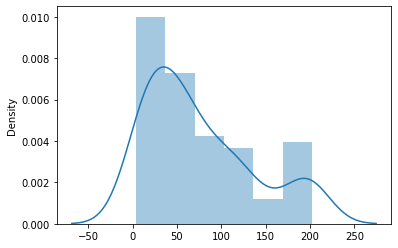

In [20]:
import seaborn as sns

sns.distplot(r)

In [151]:
import sys
sys.path.append('../')

from pettingzoo.test import parallel_api_test
from src.environments import simple_pd_v0

env = dilemma_v0.env()
env = to_parallel(env)

parallel_api_test(env, num_cycles=1)


In [191]:
env = dilemma_v0.env('sd')

#env = ss.agent_indicator_v0(env)
rewards = []
env.reset()

In [227]:

obs, reward, done, info = env.last()
print(obs, reward, done, info)
rewards.append(reward)
act = model.predict(2)[0] if not done else None
env.step(1)
env.render()

1 1 False {}
Current state: Agent1: ANTI_SOCIAL , Agent2: ANTI_SOCIAL
{'player_0': 1, 'player_1': 1}



In [65]:
[0 for n in range(5)]

[0, 0, 0, 0, 0]

In [26]:
np.zeros((2,))

array([0., 0.])

In [72]:
import numpy as np

np.random.choice(2,  p=[0.5, 0.5])

1

In [35]:
np.log(1 - 0.1 - 0.9 - 0.1*0.9)

<ipython-input-35-b1cebb2cf1ce>:1: RuntimeWarning: invalid value encountered in log
  np.log(1 - 0.1 - 0.9 - 0.1*0.9)


nan

In [38]:
np.log(0.5)

-0.6931471805599453

In [40]:
1 - 0.1 - 0.9 + 0.1*0.9

0.09000000000000001

In [99]:
f = np.zeros(100)
np.insert(f, 2, 5)

array([0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [191]:
np.random.choice([0,1], p=[0.5,0.5])

1

In [ ]:
# if self.prob:
        #     print('action2', action)
        #     if action == 0:
        #         action = np.random.choice([0,1], p=[0,1])
        #         if action == 1: print('flipped')